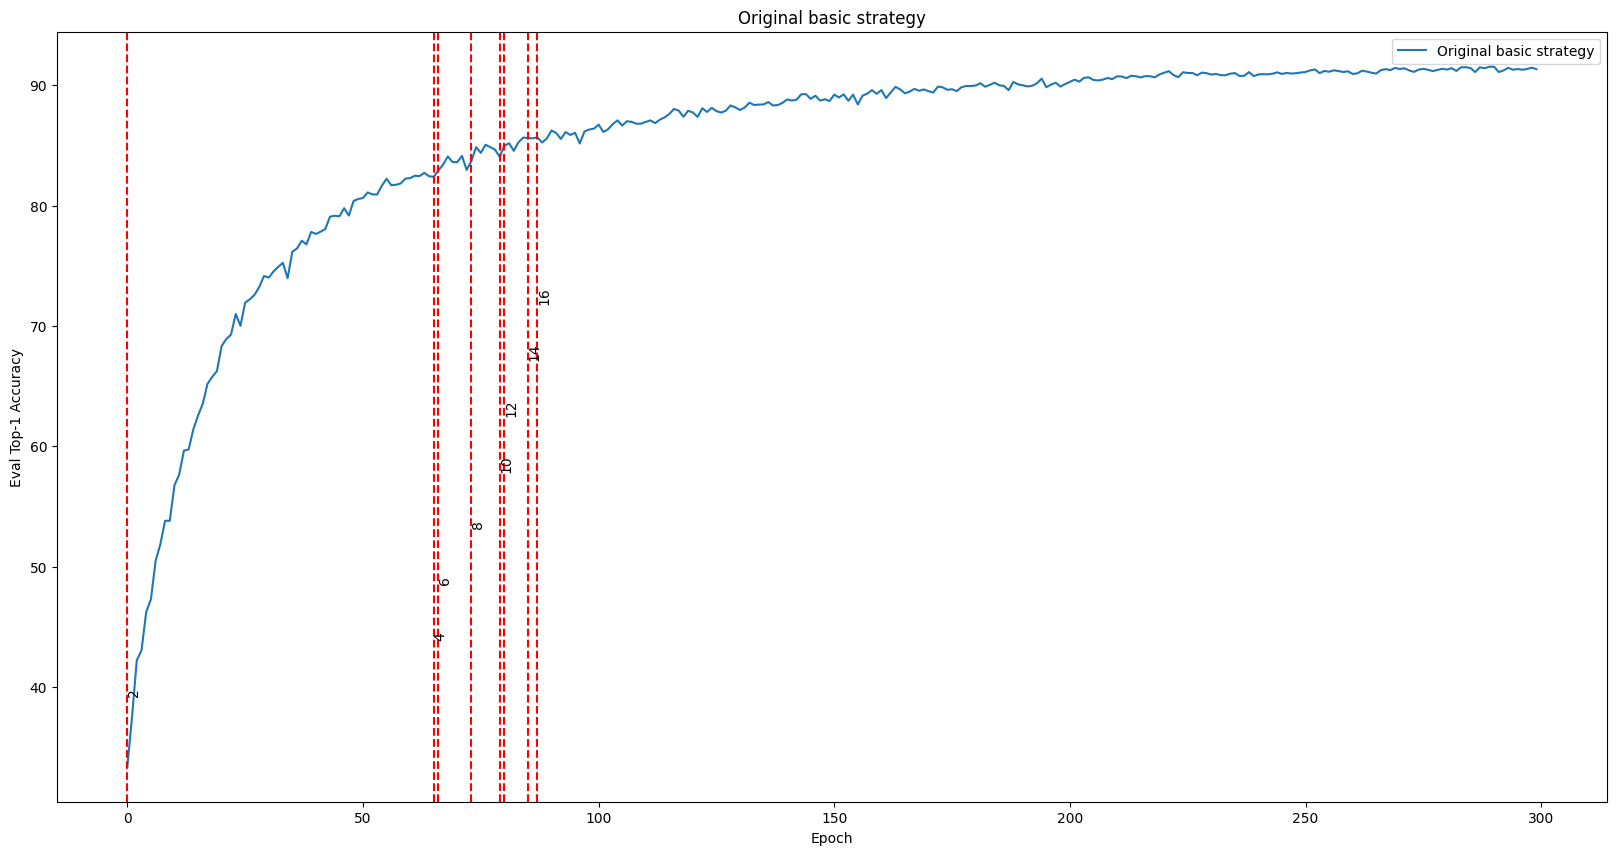

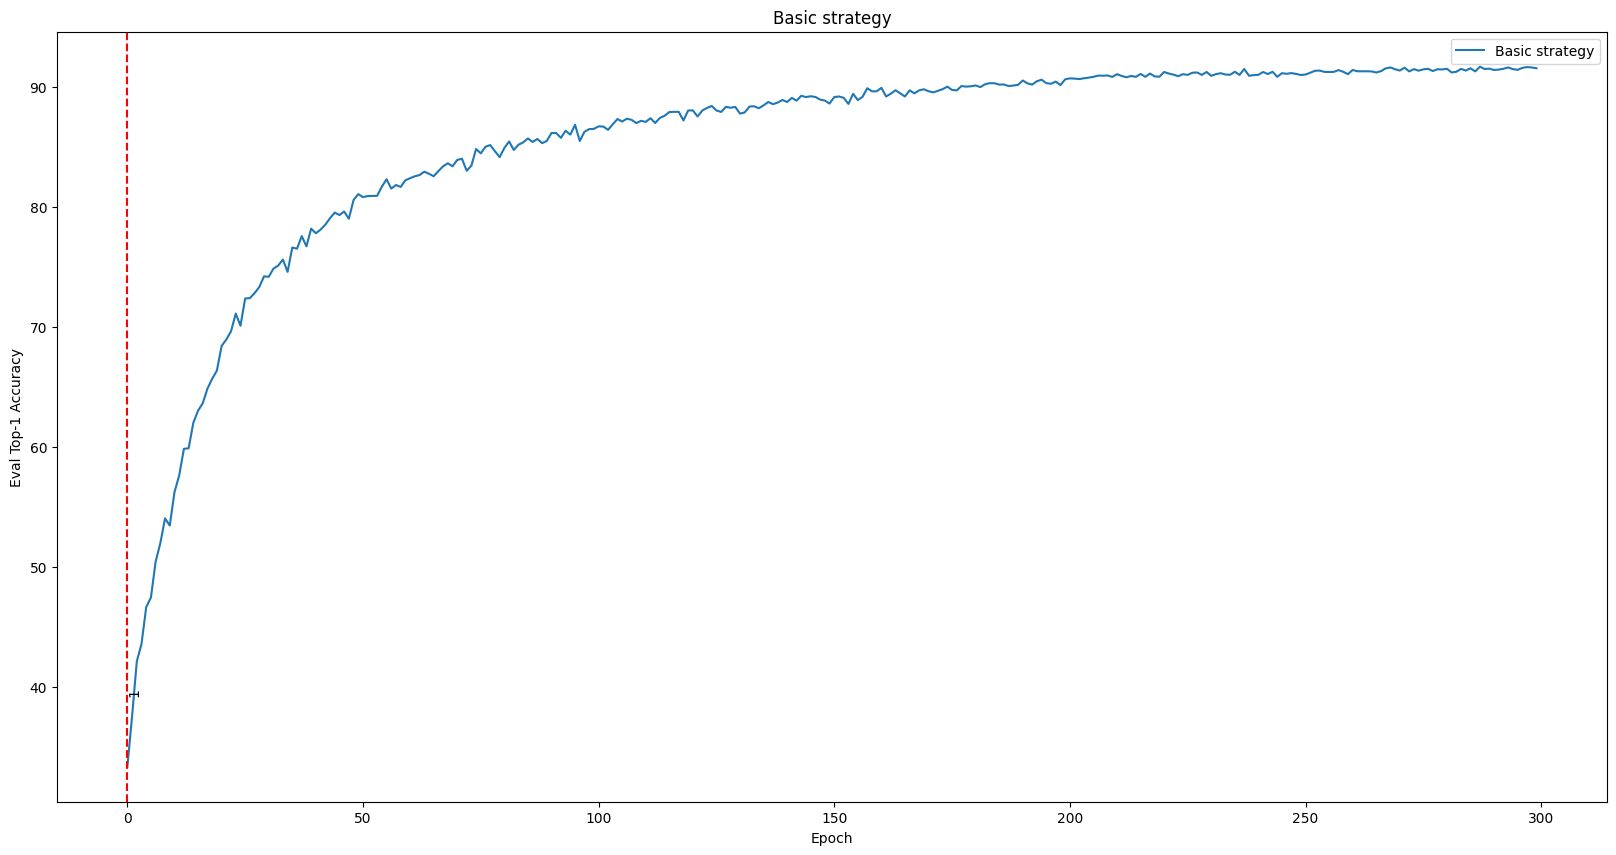

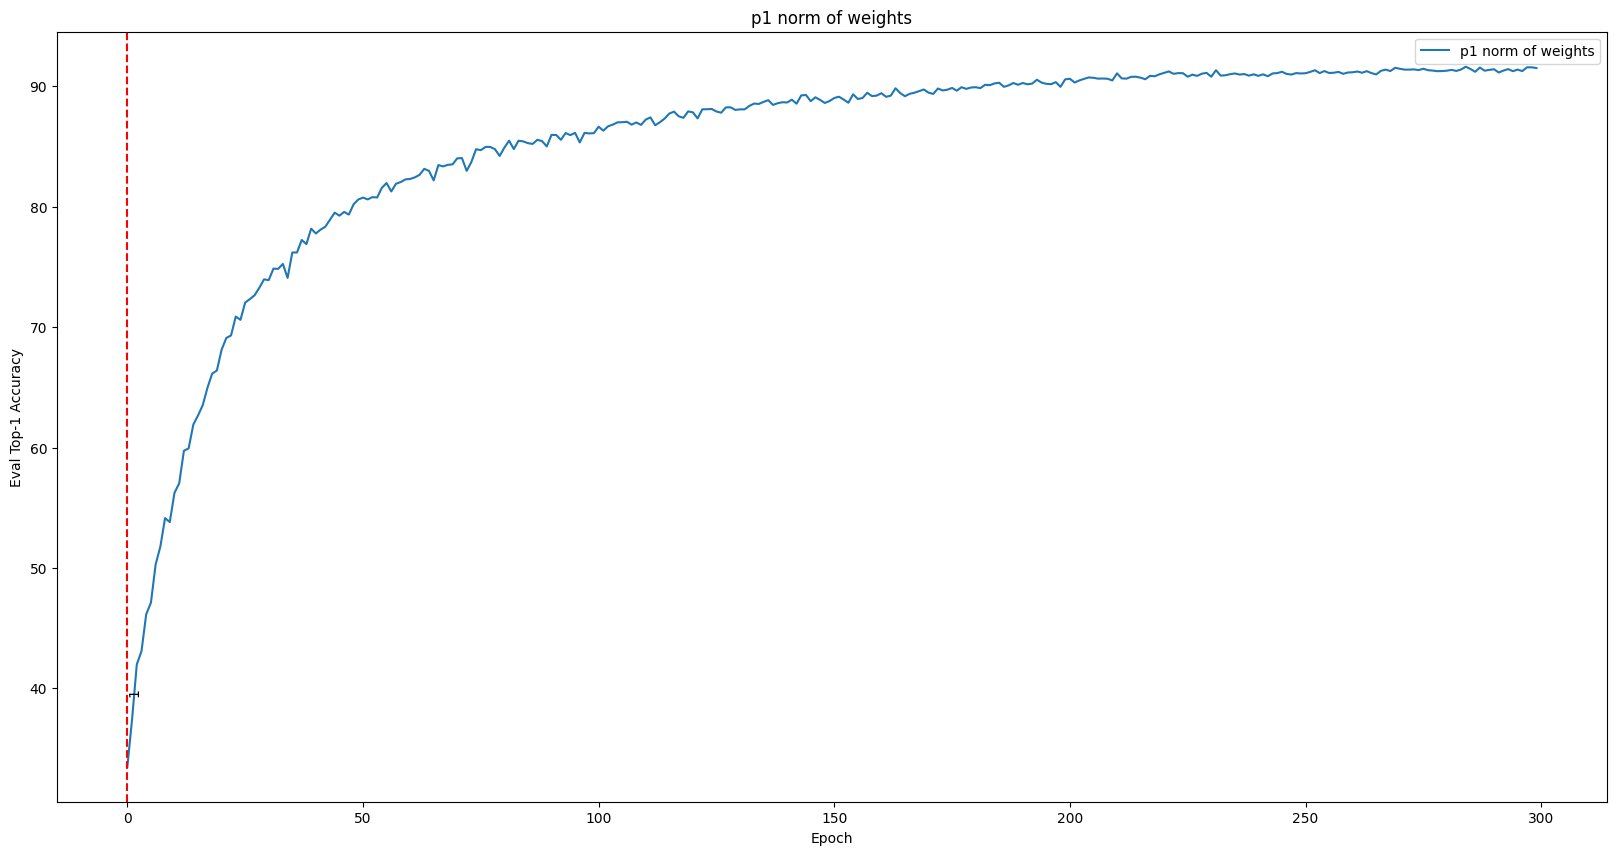

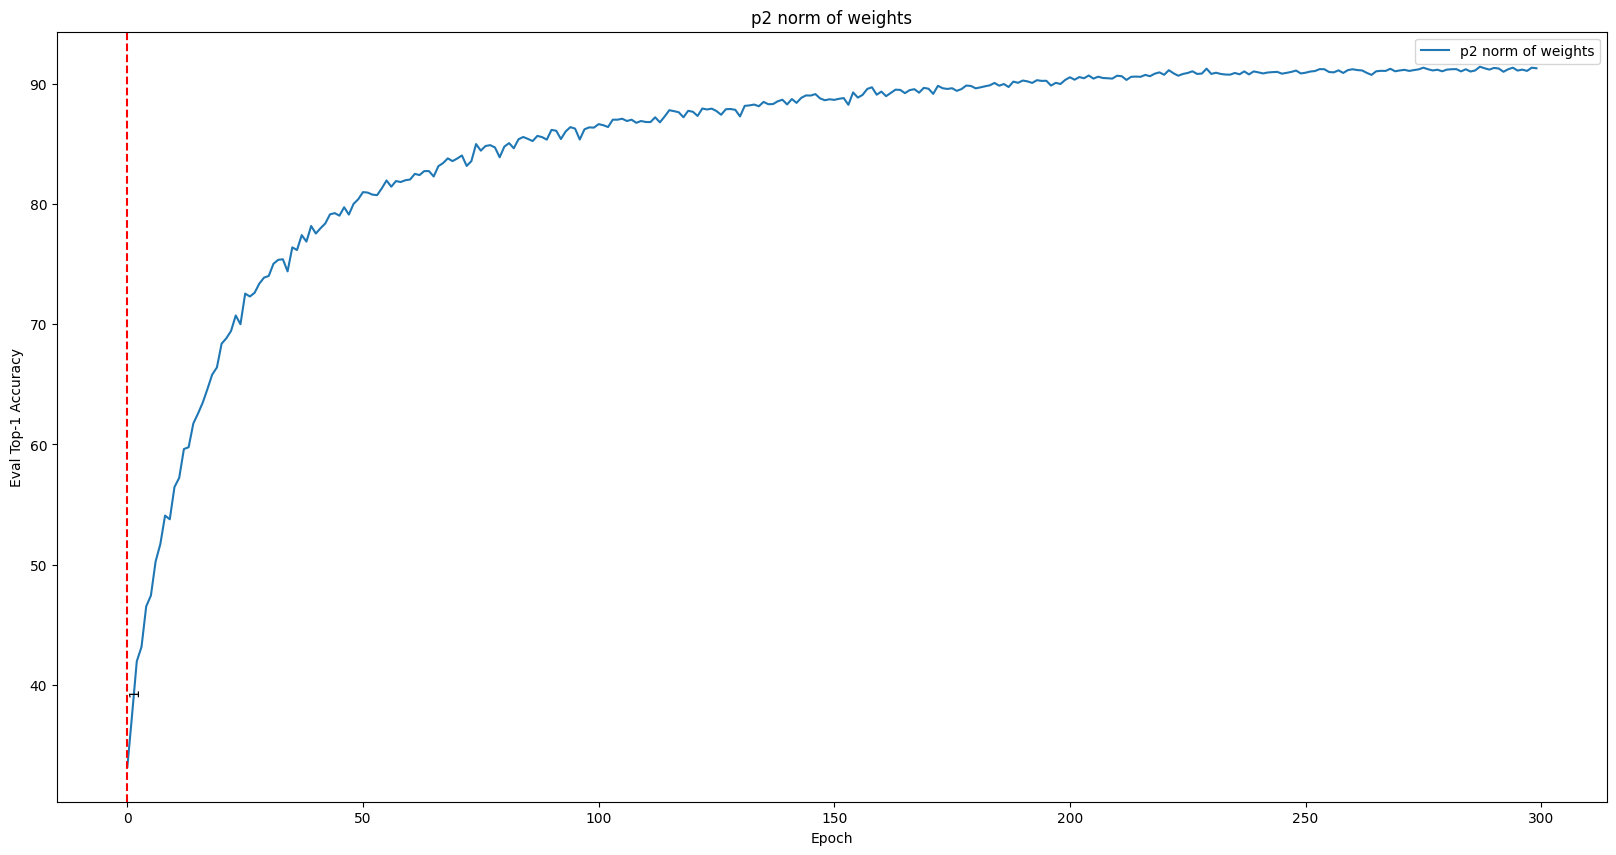

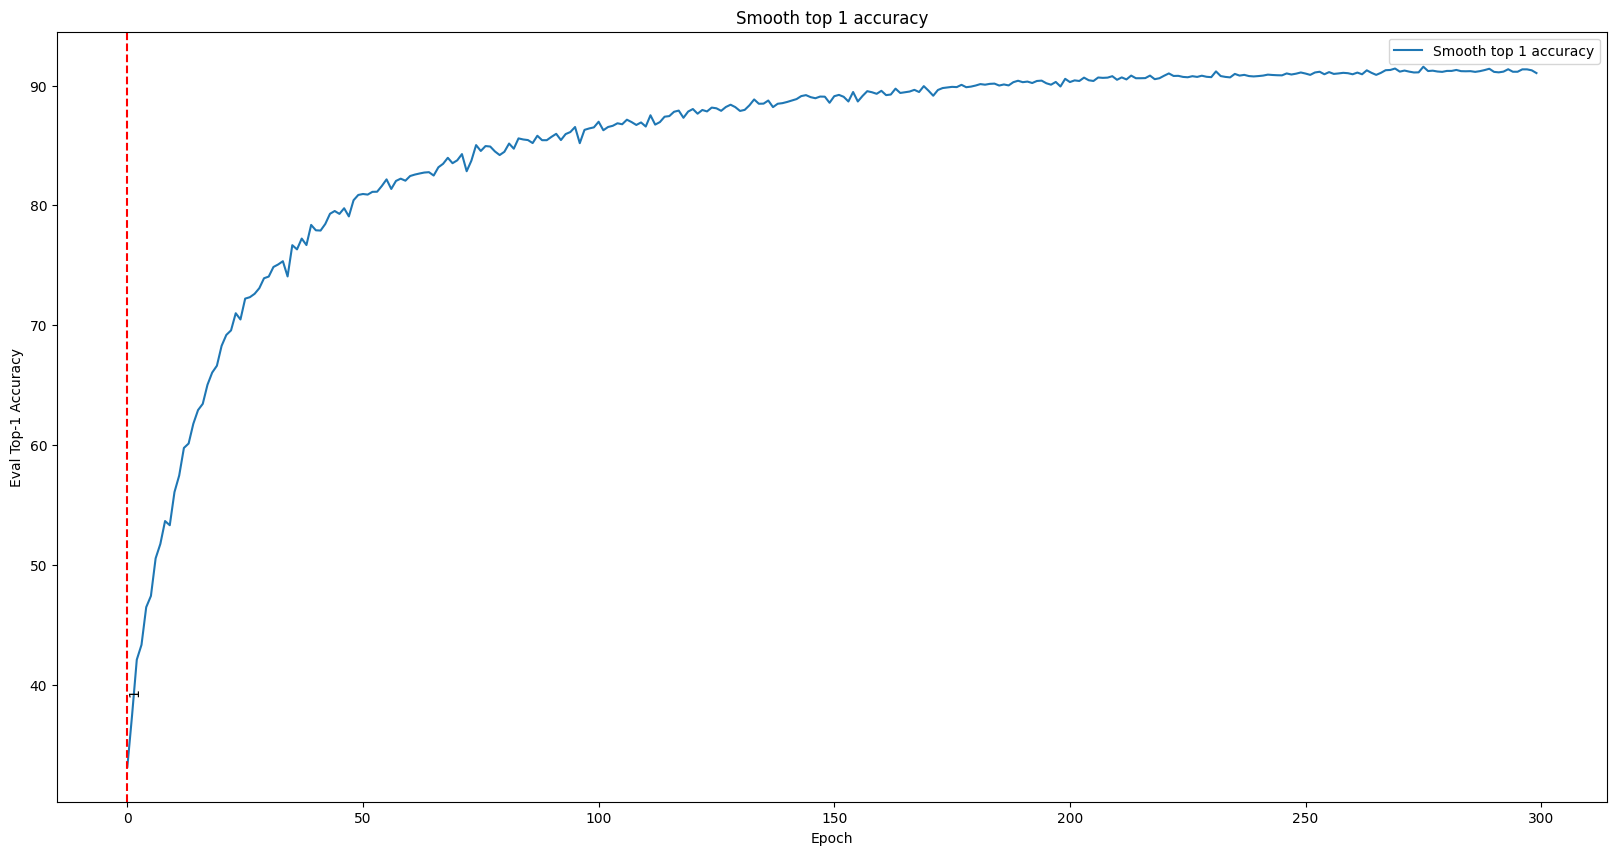

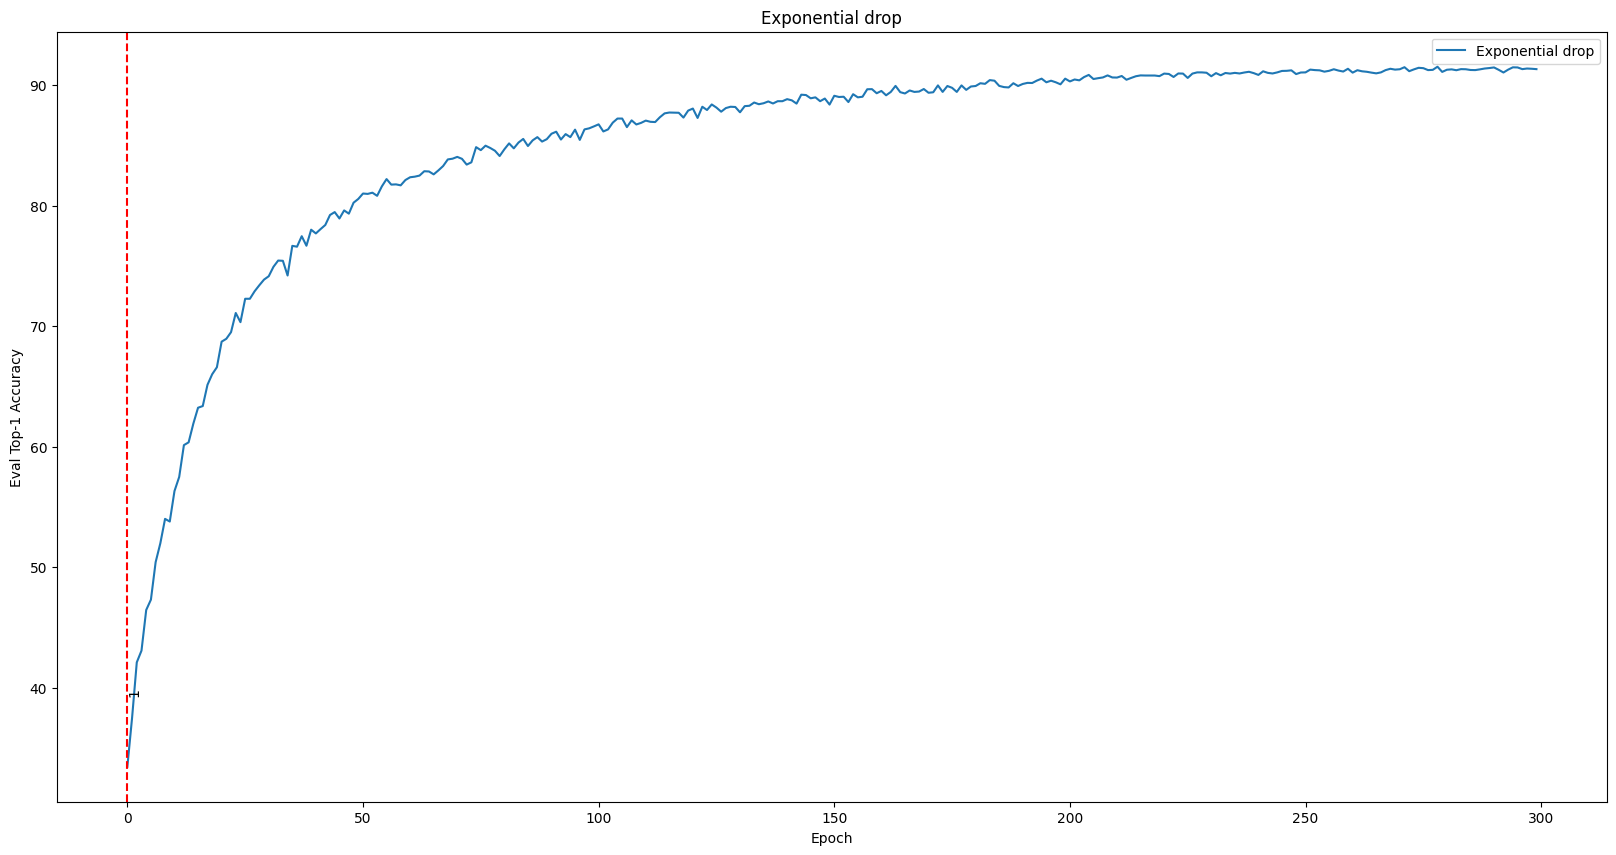

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

paths = [
    ('/home/sharipov/monet/output/train/Upd_Exp1_CIFAR10_dynamic_16_layer/summary.csv', 'Original basic strategy'),
    ('/home/sharipov/monet/output/train/Upd_Exp2_CIFAR10_dynamic_strat_0_16_layer/summary.csv', "Basic strategy"),
    ('/home/sharipov/monet/output/train/Upd_Exp1_CIFAR10_dynamic_strat_4_16_layer/summary.csv', 'p1 norm of weights'),
    ('/home/sharipov/monet/output/train/Upd_Exp1_CIFAR10_dynamic_strat_3_16_layer/summary.csv', 'p2 norm of weights'),
    ('/home/sharipov/monet/output/train/Upd_Exp1_CIFAR10_dynamic_strat_2_16_layer/summary.csv', 'Smooth top 1 accuracy'),
    ('/home/sharipov/monet/output/train/Upd_Exp1_CIFAR10_dynamic_strat_1_16_layer/summary.csv', 'Exponential drop')
]

def plot_growing_network(path, dest, name):
    # Load your CSV data into a DataFrame
    df = pd.read_csv(path)

    # Plot "eval_top1" against "epoch"
    plt.figure(figsize=(20, 10))
    plt.plot(df['epoch'], df['eval_top1'], label=name)

    # Detect points where the number of active layers changes
    layer_changes = df[df['Active layers'].diff() != 0]

    # Determine dynamic heights for annotations to avoid overlap
    # Set a base height and increment to distribute annotations vertically
    base_height = min(df['eval_top1']) + (max(df['eval_top1']) - min(df['eval_top1'])) * 0.1
    height_increment = (max(df['eval_top1']) - min(df['eval_top1'])) * 0.08
    current_height = base_height

    for index, row in layer_changes.iterrows():
        plt.axvline(x=row['epoch'], color='r', linestyle='--')
        plt.text(row['epoch'], current_height, f'{int(row["Active layers"])}', rotation=90, va='bottom')
        # Update the height for the next annotation to avoid overlap
        current_height += height_increment
        if current_height > max(df['eval_top1']) - height_increment:
            current_height = base_height  # Reset to base if exceeding plot range

    # Add some plot decorations
    plt.xlabel('Epoch')
    plt.ylabel('Eval Top-1 Accuracy')
    plt.title(name)
    plt.legend()
    plt.savefig(f'{dest}/{name}.png', dpi=300, bbox_inches='tight')
    plt.show()

for p, n in paths:
    plot_growing_network(p,'/home/sharipov/monet/output/figures', n)

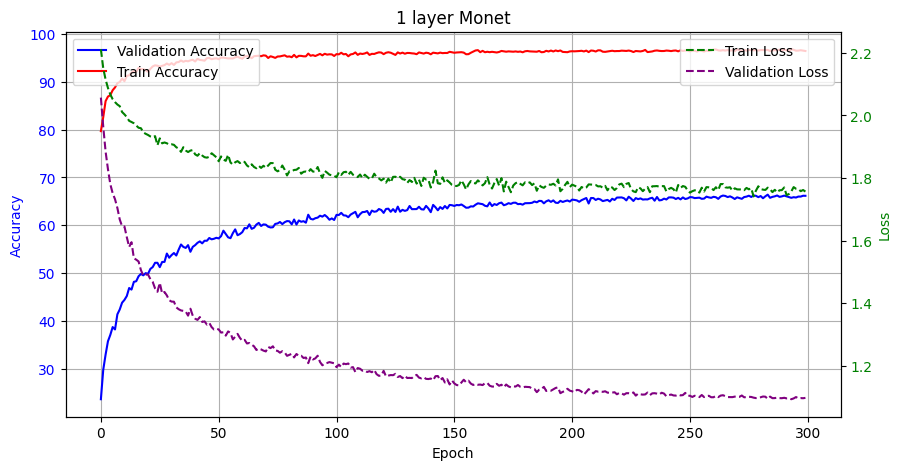

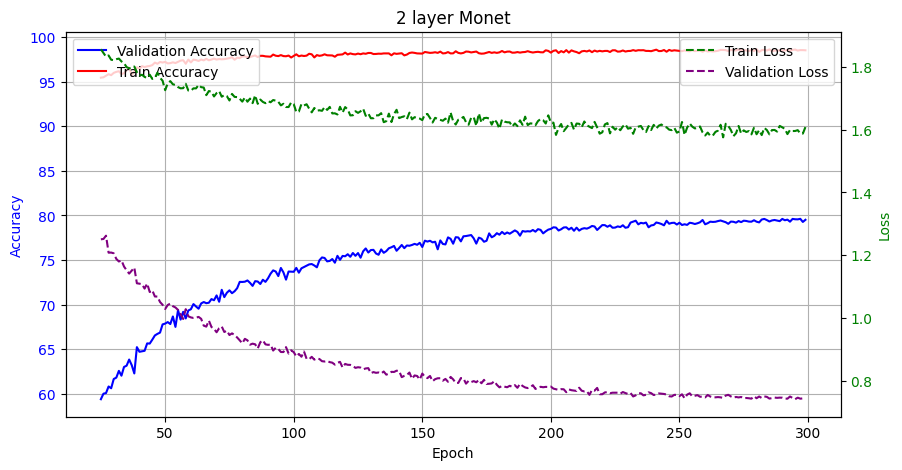

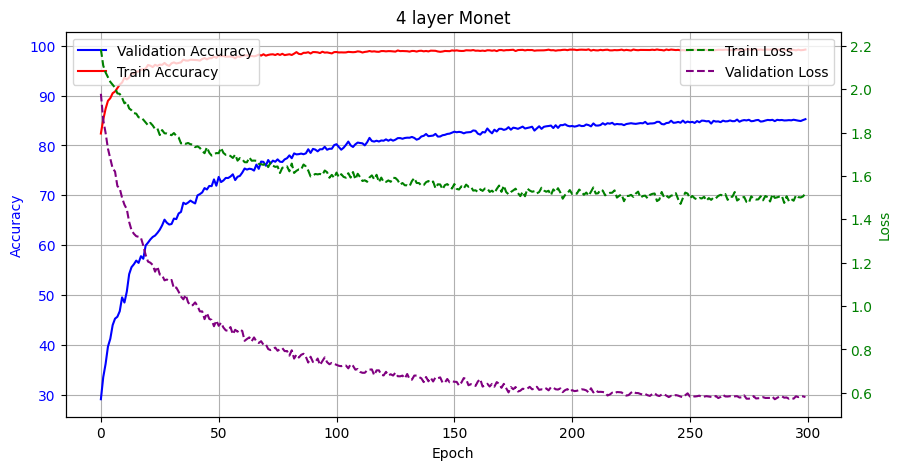

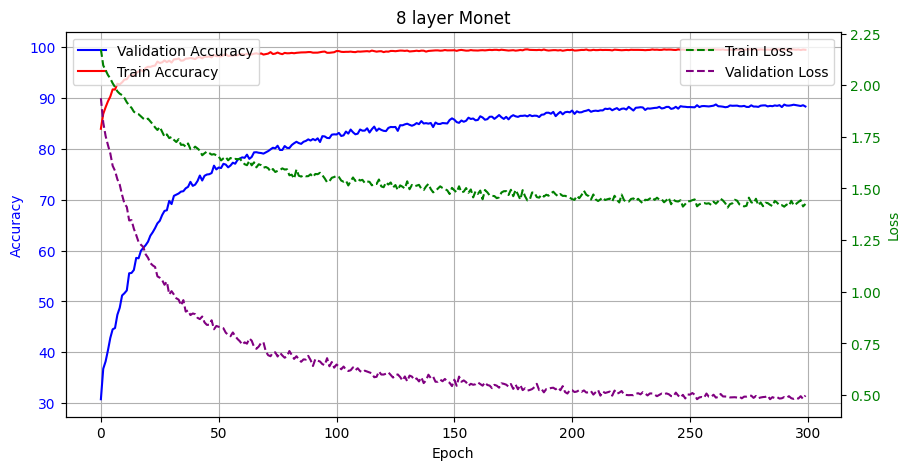

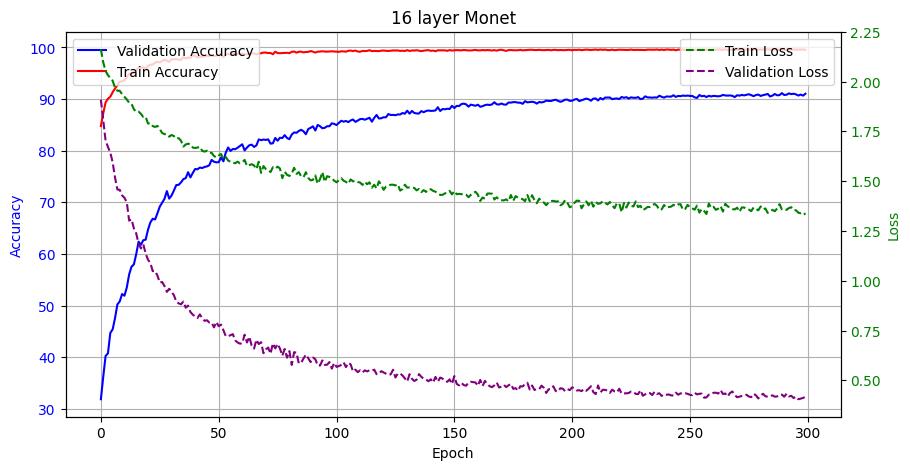

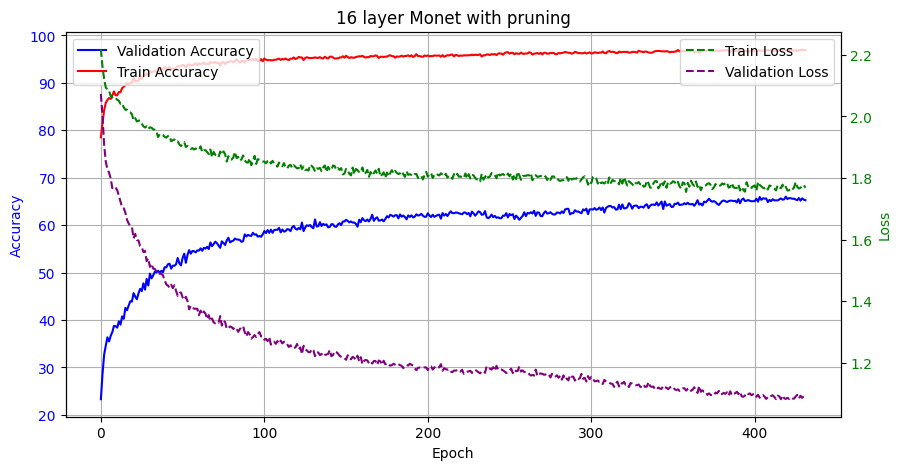

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_metrics(path, dest, name):
    # Load the CSV file into a DataFrame
    data = pd.read_csv(path)
    # Create a figure and axis for the plot
    fig, ax1 = plt.subplots(figsize=(10, 5))
    # Plot training and validation accuracy
    ax1.plot(data['epoch'], data['eval_top1'], label='Validation Accuracy', color='b')
    ax1.plot(data['epoch'], data['eval_top5'], label='Train Accuracy', color='r')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    # Create a second y-axis for losses
    ax2 = ax1.twinx()
    ax2.plot(data['epoch'], data['train_loss'], label='Train Loss', color='g', linestyle='--')
    ax2.plot(data['epoch'], data['eval_loss'], label='Validation Loss', color='purple', linestyle='--')
    ax2.set_ylabel('Loss', color='g')
    ax2.tick_params(axis='y', labelcolor='g')
    ax2.legend(loc='upper right')
    plt.title(name)
    plt.savefig(f'{dest}/{name}.png', dpi=300, bbox_inches='tight')
    plt.show()

paths = [
    ('/home/sharipov/monet/output/train/Upd_Exp6_CIFAR10_1_layer/summary.csv', '1 layer Monet'),
    ('/home/sharipov/monet/output/train/Upd_Exp6_CIFAR10_2_layer/summary.csv', '2 layer Monet'),
    ('/home/sharipov/monet/output/train/Upd_Exp4_CIFAR10_4_layer/summary.csv', '4 layer Monet'),
    ('/home/sharipov/monet/output/train/Upd_Exp6_CIFAR10_8_layer/summary.csv', '8 layer Monet'),
    ('/home/sharipov/monet/output/train/Upd_Exp6_CIFAR10_16_layer/summary.csv', '16 layer Monet'),
    ('/home/sharipov/monet/output/train/Upd_Exp2_CIFAR10_prune_16_layer/summary.csv', '16 layer Monet with pruning'),
]

for p, n in paths:
    plot_metrics(p, '/home/sharipov/monet/output/figures', n)
